### Auther: Munther Alnghemshi <br>
### Date: 11/19/2020 <br>
### Title: Heart Disease Anaysis 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import packages

In [36]:
data = pd.read_csv("HeartD.csv")

print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [37]:
data.head() #showing the data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### This data contain information related to factor responsible for Heart Attack, so our goal is to analyze the trends to predict a pattern or indications that could lead to a heart attack.

The dataset contains the following features: <br>
1. age(in years)<br>
2. sex: (1 = male; 0 = female)<br>
3. cp: chest pain type<br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br>
5. chol: serum cholestoral in mg/dl<br>
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
7. restecg: resting electrocardiographic results<br>
8. thalach: maximum heart rate achieved<br>
9. exang: exercise induced angina (1 = yes; 0 = no)<br>
10. oldpeak: ST depression induced by exercise relative to rest<br>
11. slope: the slope of the peak exercise ST segment<br>
12. ca: number of major vessels (0-3) colored by flourosopy<br>
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
14. target: 1 or 0<br>

## Numerical summary of the data

### The visual representations below show the counts of each attributes in our dataset 

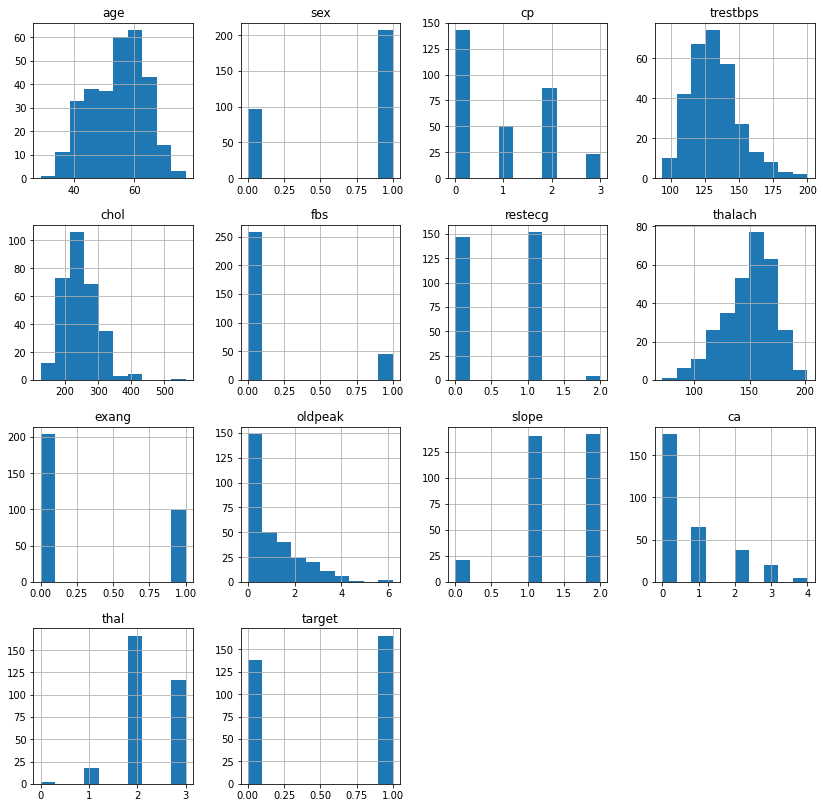

In [21]:
numbers = pd.Series(data.columns) #storing the attribute names
data[numbers].hist(figsize = (14, 14))
plt.show();

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


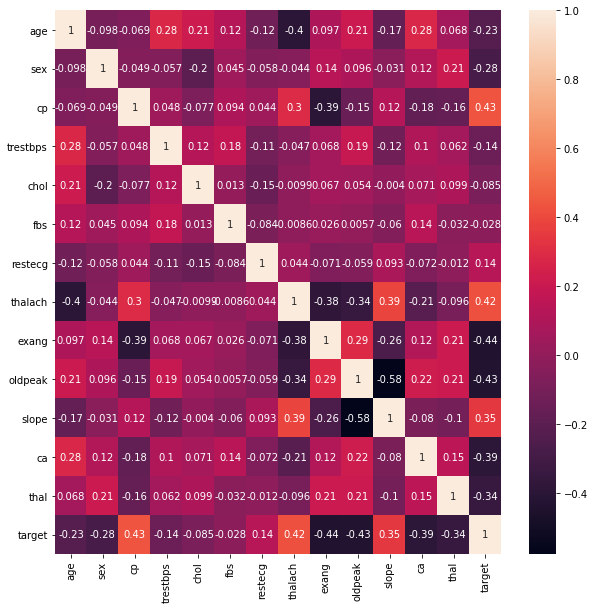

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True) #ploting matrix corr
plt.show()

### The Correlation matrix above shows that the following attributes are positively corrolated with targe: CP,restecg, slope, and thalach

## Hence, my goal in this report is to investagate the numerical values of the positively corrolated attributes to come to a conclusion when is a patien is very likely to have a heart attack


<AxesSubplot:>

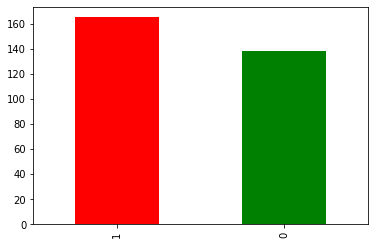

In [13]:
data.target.value_counts().plot(kind="bar", color=["red", "green"]) #plloting frequency of population w/ to target 

### The representation above shows the 165 patiens with heart disease and 138 patiens without heart disease

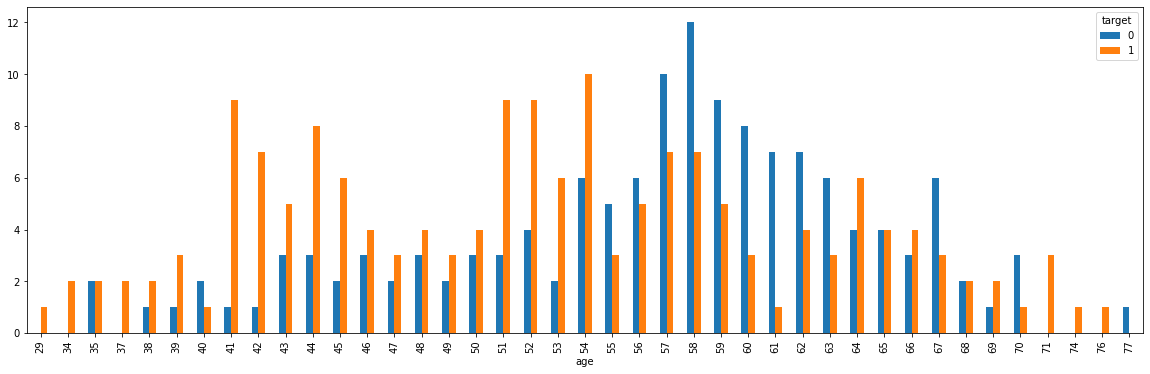

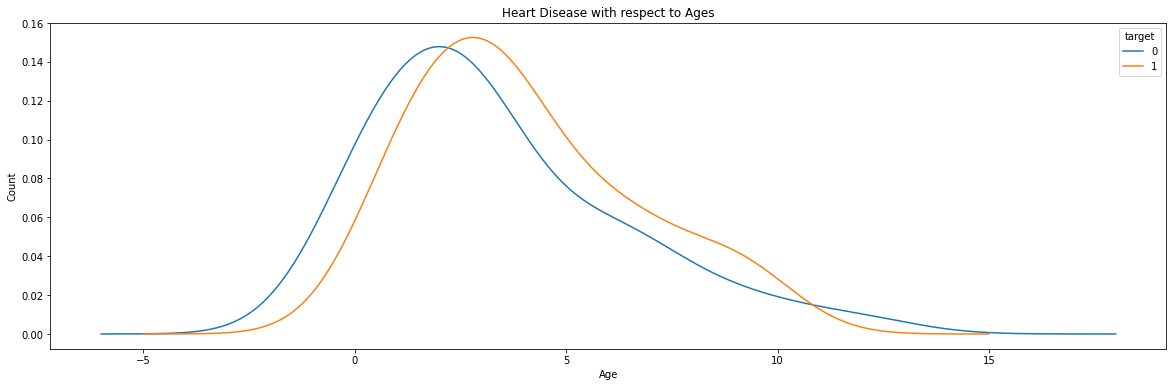

In [59]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
pd.crosstab(data.age,data.target).plot(kind="density",figsize=(20,6))
plt.title('Heart Disease with respect to Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The two representations above show that the density of cases having a heart attck is positively skewd on the age axis with respect to the cases where there is no presence of a heart attck. Also, shows that people at the ages of 45-55 are more likely in the subgroup of pain(=1) to have a heart attack

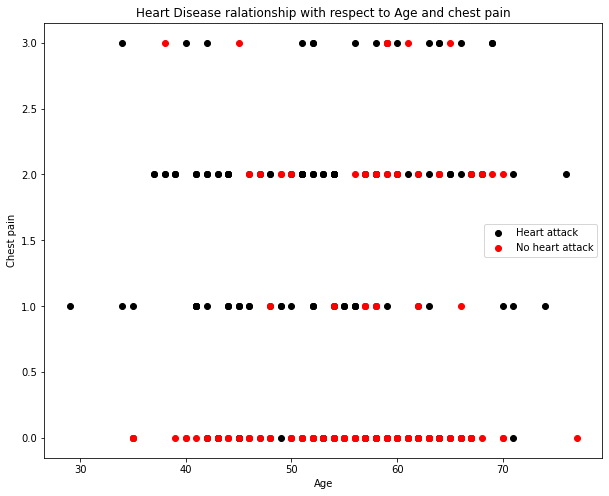

In [39]:
plt.figure(figsize=(10, 8))

# Scatter points with disease
plt.scatter(data.age[data.target==1],
            data.cp[data.target==1],
            c="black")

# Scatter points no disease
plt.scatter(data.age[data.target==0],
            data.cp[data.target==0],
            c="red")
# adding a title and naming axes 
plt.title("Heart Disease ralationship with respect to Age and chest pain")
plt.xlabel("Age")
plt.ylabel("Chest pain")
plt.legend(["Heart attack", "No heart attack"]);


### The above graph shows that in the case of chest pain is equal to 1 a pateint is more likely to have a heart attck 
#### people at the ages of 45-55 are more likely in the subgroup of pain(=1) to have a heart attack.

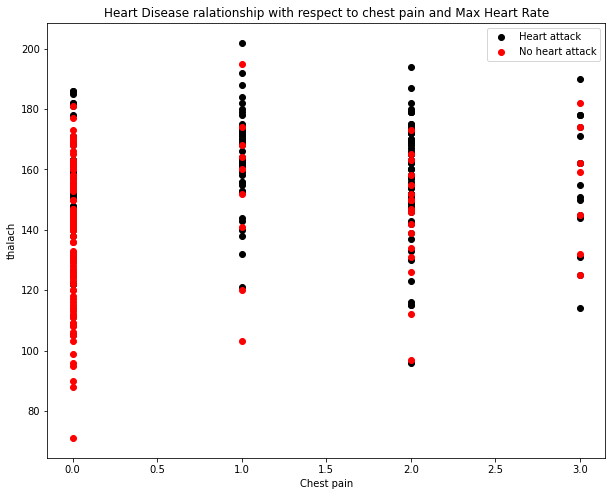

In [56]:
plt.figure(figsize=(10, 8))

# Scatter points with disease
plt.scatter(data.cp[data.target==1],
            data.thalach[data.target==1],
            c="black")

# Scatter points no disease
plt.scatter(data.cp[data.target==0],
            data.thalach[data.target==0],
            c="red")
# adding a title and naming axes 
plt.title("Heart Disease ralationship with respect to chest pain and Max Heart Rate")
plt.xlabel("Chest pain")
plt.ylabel("thalach")
plt.legend(["Heart attack", "No heart attack"]);

Following the previous conclusion regarding chest pain. When the chest pain is equal to 1 a pateint is more likely to have a heart attck
people at the ages of 45-55 are more likely in the subgroup of pain(=1) to have a heart attack. Additionlly, the above graph suggests that patients who have a maximum heart rate of 160 and above have a very high chance of having a heart attack. 

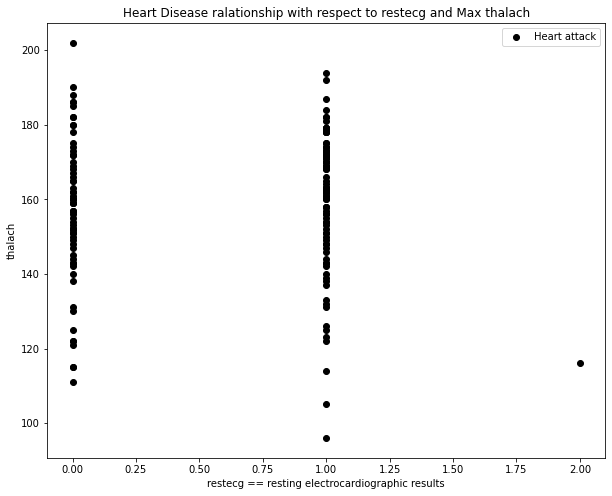

In [57]:
plt.figure(figsize=(10, 8))

# Scatter points with disease
plt.scatter(data.restecg[data.target==1],
            data.thalach[data.target==1],
            c="black")

# Scatter points no disease
plt.scatter(data.restecg[data.target==0],
            data.thalach[data.target==0],
            c="red")
# adding a title and naming axes 
plt.title("Heart Disease ralationship with respect to restecg and Max thalach")
plt.xlabel("restecg == resting electrocardiographic results")
plt.ylabel("thalach")
plt.legend(["Heart attack", "No heart attack"]);

The above representation suggests that a heart attack is possible when resting electrocardiographic results is equal to either 1 or 2 

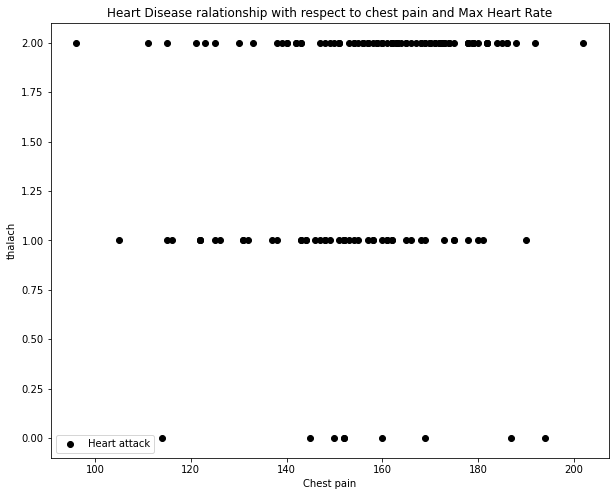

In [58]:
plt.figure(figsize=(10, 8))

# Scatter points with disease
plt.scatter(data.thalach[data.target==1],
            data.slope[data.target==1],
            c="black")

# Scatter points no disease
plt.scatter(data.thalach[data.target==0],
            data.slope[data.target==0],
            c="red")
# adding a title and naming axes 
plt.title("Heart Disease ralationship with respect to chest pain and Max Heart Rate")
plt.xlabel("Chest pain")
plt.ylabel("thalach")
plt.legend(["Heart attack", "No heart attack"]);

If the patient has a slope of either 1, or 2 then the patient is more likely to have a heart attack 

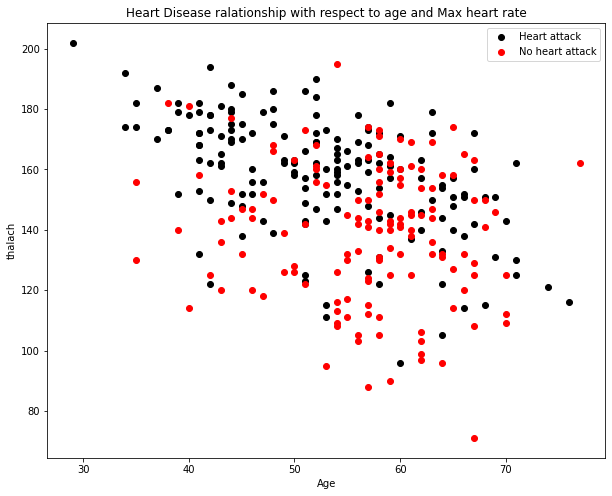

In [53]:
plt.figure(figsize=(10, 8))

# Scatter points with disease
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="black")
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="red")
plt.title("Heart Disease ralationship with respect to age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.legend(["Heart attack", "No heart attack"]);

It shows shows that people at the ages of 45-55 are more likely in the subgroup of thalach(nearly = 160) to have a heart attack 

## Summary: 

Patients with the following values have the highest probability of getting a heart attack: <br>
1.Chest pain of 1 <br>
2.Age group of 45-55 years <br>
3.Maximum heart rate of nearly 160 or higher <br>
4.Resting electrocardiographic results is equal to either 1 or 2 <br>
5.A slope of either 1, or 2   <br>